In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import spacy

In [2]:
start_page=7
end_page=14
start_url = 'https://www.kathimerini.gr/tag/metoo/page/'

In [3]:
kathimerini_article_links=[]

for page_num in range(start_page, end_page+1):
  page_url = start_url + str(page_num)
  response = requests.get(page_url)
  doc = BeautifulSoup(response.text, 'html.parser')
  kathimerini_original = doc.find('div',  attrs={'class': 'columns is-flex-wrap-wrap'}).find_all('a')# πήρα τον γενικό κώδικα που περιλαμβάνει όλα τα λινκσ
  for i in kathimerini_original:
    end = str(i).find('>')# το > δειχνει το τελος του link
    link = str(i)[9:end-1]#9 χαρακτήρες  <a href=" ετσι ζητάμε να πάρει μόνο το λινκ
    if (link not in kathimerini_article_links):
      if('is-elem-fullheight' not in  link):
        kathimerini_article_links.append(link)

In [4]:
kathimerini_article_links

['https://www.kathimerini.gr/culture/561286612/otan-oi-gynaikes-miloyn/',
 'https://www.kathimerini.gr/opinion/561287098/to-ethniko-theatro-apo-ton-fovo-stin-apaxiosi/',
 'https://www.kathimerini.gr/society/561285301/nea-dioxi-gia-viasmo-kata-ithopoioy/',
 'https://www.kathimerini.gr/opinion/561284296/stathis-livathinos-sagonia/',
 'https://www.kathimerini.gr/society/561284341/nea-kataggelia-gia-lignadi-2/',
 'https://www.kathimerini.gr/society/561282856/ekklisi-gia-spitia-toy-paidioy/',
 'https://www.kathimerini.gr/opinion/561281719/otan-o-kosmos-voyize/',
 'https://www.kathimerini.gr/society/561281617/dekaokto-fakeloys-paredose-o-p-tsaroychas-ston-eisaggelea/',
 'https://www.kathimerini.gr/culture/561278059/i-sexoyaliki-via-mas-afora-oloys/',
 'https://www.kathimerini.gr/society/561281605/aitima-kataschesis-psifiakon-dedomenon-ypevale-synigoros-minyti/',
 'https://www.kathimerini.gr/society/561279145/otan-ithopoios-payei-na-simainei-fos/',
 'https://www.kathimerini.gr/politics/561280

In [5]:
kathimerini_original

[<a href="https://www.kathimerini.gr/opinion/561255379/ligi-psychraimia-den-vlaptei-2/">
 <figure class="image">
 <picture class="">
 <source media="(min-width: 1201px)" srcset="https://www.kathimerini.gr/k-default-image.jpg" type="image/jpeg"/>
 <source media="(min-width: 601px) and (max-width: 1200px)" srcset="https://www.kathimerini.gr/k-default-image.jpg" type="image/jpeg"/>
 <source media="(max-width: 600px)" srcset="https://www.kathimerini.gr/k-default-image.jpg" type="image/jpeg"/>
 <img alt="λίγη-ψυχραιμία-δεν-βλάπτει-0" class="picture-nx-medium-two" data-pagespeed-no-defer="" height="253" src="https://www.kathimerini.gr/k-default-image.jpg" width="450"/>
 </picture>
 </figure>
 </a>,
 <a href="https://www.kathimerini.gr/opinion/561255379/ligi-psychraimia-den-vlaptei-2/">
 <p class="title is-5 medium_title nx-title">Λίγη ψυχραιμία δεν βλάπτει</p>
 </a>,
 <a href="https://www.kathimerini.gr/opinion/561255379/ligi-psychraimia-den-vlaptei-2/">
 						Ηταν το ίδιο η υπόθεση Χάρβεϊ 

In [6]:
full_articles_list =[]
for url in kathimerini_article_links:
  response  = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')
  article_dict = {}

  try:
    title = soup.find('h1').text
    article_dict['title'] = title
  except:
    article_dict['title'] = ''
    pass

  try: #λεμε να ενωσει παραγραφους
    p_texts_list = []
    paragraphs = soup.find_all('p')
    for p in paragraphs:
      p_texts_list.append(p.text)
      full_text = ' '.join(p_texts_list)
      full_text = "".join(full_text.splitlines())
      article_dict['full_text'] = full_text
  except:
    article_dict['full_text'] = ''
    pass

  try:
    author = soup.find('a' , {'class': "url fn n", 'rel': True}).text.strip()
    article_dict['author'] = author
  except:
    article_dict['author'] = ''
    pass

  try:
    date = soup.find('time')['datetime']
    article_dict['date'] = date
  except:
    article_dict['date'] = 'No date found'
  full_articles_list.append(article_dict)

In [7]:
kathimerini_df = pd.DataFrame(full_articles_list)
kathimerini_df

title  \
0                              Όταν οι γυναίκες μιλούν   
1         Το Εθνικό Θέατρο, από τον φόβο στην απαξίωση   
2                   Νέα δίωξη για βιασμό κατά ηθοποιού   
3                            Στάθης Λιβαθινός: Σαγόνια   
4                           Νεα καταγγελία για Λιγνάδη   
..                                                 ...   
115                                      Balkan Me too   
116                      Κακοποίηση: ούτε μία ούτε δύο   
117                    «Δεν υπήρχαν αυτιά να ακούσουν»   
118  Θύματα κακοποίησης μιλούν στην «Κ»: Δεν ήξερα ...   
119                 Δεν είναι η Αθλήτρια Α, έχει όνομα   

                                             full_text               author  \
0    Πόσο αλλάζει το σκηνοθετικό βλέμμα όταν καταγρ...     Μαρία Κατσουνάκη   
1    «Δεν θα γίνει κατανοητό ό,τι και να γράψεις. Ο...     Μαρία Κατσουνάκη   
2    Νέα ποινική δίωξη για βιασμό ασκήθηκε από την ...       Ιωάννα Μάνδρου   
3    Θα έφτανε η στιγμή. Αργά ή γρήγορα, θα έφτανε ...   Μιχάλης Τσιντσίνης   
4    Νέα μήνυση για βιασμό κατατέθηκε σε βάρος του ...       Ιωάννα Μάνδρου   
..                                                 ...                  ...   
115  Φοιτήτριες του Αριστοτελείου κατήγγειλαν τις π...  Τάκης Θεοδωρόπουλος   
116  Η ιδέα ότι μόνον η επιβεβαιωμένη σεξουαλική πρ...  Δημήτρης Ρηγόπουλος   
117  Οι ολυμπιονίκες της ιστιοπλοΐας Τ. Μάντης και ...    Σπυριδούλα Σπανέα   
118  «Θα είναι τρεμάμενη η φωνή μου και ίσως να κομ...         Ηλιάνα Μάγρα   
119  «Τα όρια ανάμεσα στη σκληρή προπόνηση και στην...     Μαρία Κατσουνάκη   

                          date  
0    2021-03-07T08:01:23+02:00  
1    2021-03-06T21:03:53+02:00  
2    2021-03-05T11:26:54+02:00  
3    2021-03-04T20:49:02+02:00  
4    2021-03-04T14:45:00+02:00  
..                         ...  
115  2021-01-27T20:55:37+02:00  
116  2021-01-26T21:00:47+02:00  
117  2021-01-25T08:35:45+02:00  
118  2021-01-24T21:53:04+02:00  
119  2021-01-24T21:21:50+02:00  

[120 rows x 4 columns]

In [8]:
kathimerini_df['datetime'] = pd.to_datetime(kathimerini_df['date'],utc=True)
kathimerini_df['year'] = pd.DatetimeIndex(kathimerini_df['datetime'], ).year
kathimerini_df['month'] = pd.DatetimeIndex(kathimerini_df['datetime']).month
kathimerini_df['day'] = pd.DatetimeIndex(kathimerini_df['datetime']).day
kathimerini_df['hour'] = pd.DatetimeIndex(kathimerini_df['datetime']).hour
kathimerini_df

title  \
0                              Όταν οι γυναίκες μιλούν   
1         Το Εθνικό Θέατρο, από τον φόβο στην απαξίωση   
2                   Νέα δίωξη για βιασμό κατά ηθοποιού   
3                            Στάθης Λιβαθινός: Σαγόνια   
4                           Νεα καταγγελία για Λιγνάδη   
..                                                 ...   
115                                      Balkan Me too   
116                      Κακοποίηση: ούτε μία ούτε δύο   
117                    «Δεν υπήρχαν αυτιά να ακούσουν»   
118  Θύματα κακοποίησης μιλούν στην «Κ»: Δεν ήξερα ...   
119                 Δεν είναι η Αθλήτρια Α, έχει όνομα   

                                             full_text               author  \
0    Πόσο αλλάζει το σκηνοθετικό βλέμμα όταν καταγρ...     Μαρία Κατσουνάκη   
1    «Δεν θα γίνει κατανοητό ό,τι και να γράψεις. Ο...     Μαρία Κατσουνάκη   
2    Νέα ποινική δίωξη για βιασμό ασκήθηκε από την ...       Ιωάννα Μάνδρου   
3    Θα έφτανε η στιγμή. Αργά ή γρήγορα, θα έφτανε ...   Μιχάλης Τσιντσίνης   
4    Νέα μήνυση για βιασμό κατατέθηκε σε βάρος του ...       Ιωάννα Μάνδρου   
..                                                 ...                  ...   
115  Φοιτήτριες του Αριστοτελείου κατήγγειλαν τις π...  Τάκης Θεοδωρόπουλος   
116  Η ιδέα ότι μόνον η επιβεβαιωμένη σεξουαλική πρ...  Δημήτρης Ρηγόπουλος   
117  Οι ολυμπιονίκες της ιστιοπλοΐας Τ. Μάντης και ...    Σπυριδούλα Σπανέα   
118  «Θα είναι τρεμάμενη η φωνή μου και ίσως να κομ...         Ηλιάνα Μάγρα   
119  «Τα όρια ανάμεσα στη σκληρή προπόνηση και στην...     Μαρία Κατσουνάκη   

                          date                  datetime  year  month  day  \
0    2021-03-07T08:01:23+02:00 2021-03-07 06:01:23+00:00  2021      3    7   
1    2021-03-06T21:03:53+02:00 2021-03-06 19:03:53+00:00  2021      3    6   
2    2021-03-05T11:26:54+02:00 2021-03-05 09:26:54+00:00  2021      3    5   
3    2021-03-04T20:49:02+02:00 2021-03-04 18:49:02+00:00  2021      3    4   
4    2021-03-04T14:45:00+02:00 2021-03-04 12:45:00+00:00  2021      3    4   
..                         ...                       ...   ...    ...  ...   
115  2021-01-27T20:55:37+02:00 2021-01-27 18:55:37+00:00  2021      1   27   
116  2021-01-26T21:00:47+02:00 2021-01-26 19:00:47+00:00  2021      1   26   
117  2021-01-25T08:35:45+02:00 2021-01-25 06:35:45+00:00  2021      1   25   
118  2021-01-24T21:53:04+02:00 2021-01-24 19:53:04+00:00  2021      1   24   
119  2021-01-24T21:21:50+02:00 2021-01-24 19:21:50+00:00  2021      1   24   

     hour  
0       6  
1      19  
2       9  
3      18  
4      12  
..    ...  
115    18  
116    19  
117     6  
118    19  
119    19  

[120 rows x 9 columns]

In [9]:
kathimerini_df_feb = kathimerini_df.loc[kathimerini_df['month']  == 2]
kathimerini_df_feb.tail(5)

title  \
108           Η Ρόουζ ΜακΓκάουαν για τον Μέριλι Μάνσον   
109  Λύτρωση, δικαιοσύνη, εξυγίανση – Ηθοποιοί και ...   
110                               Σταρόβειες εξισώσεις   
111                             Ο καιρός της συγγνώμης   
112                               Η βία στα χείλη της…   

                                             full_text               author  \
108  Η Ρόουζ ΜακΓκάουαν εξέφρασε την υποστήριξή της...             Newsroom   
109  «Θυμάμαι έντονα τη φράση που μας έλεγε ο Βασίλ...     Μάρω Βασιλειάδου   
110  Ο Δημήτρης Σταρόβας είναι εξαιρετικός μουσικός...    Τασούλα Επτακοίλη   
111  Η βία στα χείλη της… Ο καταιγισμός αποκαλύψεων...  Δημήτρης Ρηγόπουλος   
112  Τις τελευταίες ημέρες κλιμάκωσης του ελληνικού...                        

                          date                  datetime  year  month  day  \
108  2021-02-05T16:00:00+02:00 2021-02-05 14:00:00+00:00  2021      2    5   
109  2021-02-03T12:38:33+02:00 2021-02-03 10:38:33+00:00  2021      2    3   
110  2021-02-02T20:50:23+02:00 2021-02-02 18:50:23+00:00  2021      2    2   
111  2021-02-02T20:47:50+02:00 2021-02-02 18:47:50+00:00  2021      2    2   
112  2021-02-01T18:21:44+02:00 2021-02-01 16:21:44+00:00  2021      2    1   

     hour  
108    14  
109    10  
110    18  
111    18  
112    16

In [10]:
kathimerini_df_feb['full_text']

14     Τρεις ειδικοί εξηγούν στην «Κ» πώς μπορούμε να...
15     Τι έχουν πάθει οι πανεπιστημιακοί; Με ελάχιστε...
16     Ο στρατηγός Οδυσσέας Γκραντ ως νεαρός αξιωματι...
17     OΛΜΠΑΝΙ. Τον κυβερνήτη της Νέας Υόρκης, Αντριο...
18     Ο συνήγορός του δήλωσε ότι θα προσφύγει κατά τ...
                             ...                        
108    Η Ρόουζ ΜακΓκάουαν εξέφρασε την υποστήριξή της...
109    «Θυμάμαι έντονα τη φράση που μας έλεγε ο Βασίλ...
110    Ο Δημήτρης Σταρόβας είναι εξαιρετικός μουσικός...
111    Η βία στα χείλη της… Ο καταιγισμός αποκαλύψεων...
112    Τις τελευταίες ημέρες κλιμάκωσης του ελληνικού...
Name: full_text, Length: 99, dtype: object

Text(0.5, 1.02, ' Kathimerini: Συχνότητα εμφάνισης της κάθε ημέρας')

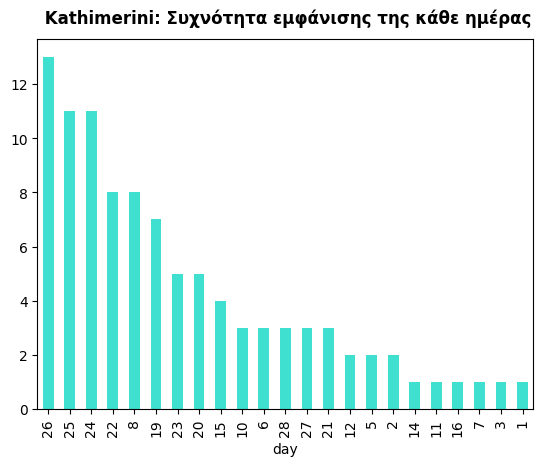

In [11]:
kathimerini_df_feb['day'].value_counts().plot(kind='bar', color='turquoise')
plt.title(' Kathimerini: Συχνότητα εμφάνισης της κάθε ημέρας', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Kathimerini: Αριθμός των άρθρων τον Φεβρουάριο')

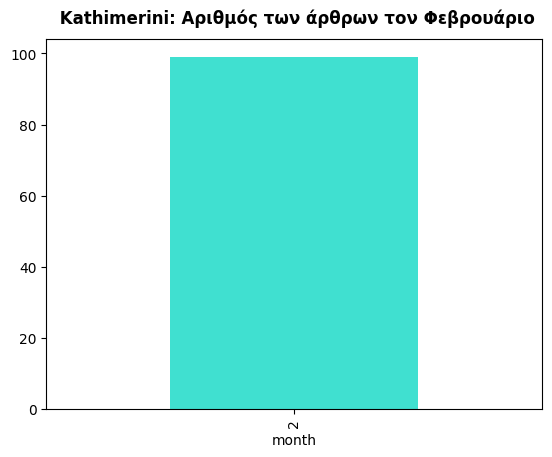

In [12]:
kathimerini_df_feb['month'].value_counts().plot(kind='bar', color='turquoise')
plt.title(' Kathimerini: Αριθμός των άρθρων τον Φεβρουάριο', y=1.02, fontweight='bold')

In [13]:
import seaborn as sns

In [14]:
import numpy as np

In [15]:
import matplotlib.pyplot as plt

In [16]:
import spacy

In [17]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 56.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [19]:
nlp = spacy.load('el_core_news_sm')

In [20]:
text = kathimerini_df_feb['full_text'].str.cat(sep = ' ')

In [21]:
full_doc= nlp(text)

In [22]:
full_doc[:200]

Τρεις ειδικοί εξηγούν στην «Κ» πώς μπορούμε να θωρακίσουμε τα παιδιά ώστε να μην πέσουν θύματα σεξουαλικής κακοποίησης Σύσσωμη η ελληνική κοινωνία βιώνει τον τελευταίο καιρό αλλεπάλληλα σοκ, καθώς τραύματα που μέχρι πρότινος αιμορραγούσαν, αθέατα και σιωπηλά, έρχονται σιγά σιγά στην επιφάνεια. Με πρωτοστάτες ανθρώπους του αθλητισμού και του πολιτισμού, πολλοί έχουν βρει το θάρρος να μοιραστούν επώδυνες εμπειρίες, κάποιοι για πρώτη φορά, στον Τύπο, στους λογαριασμούς τους στα μέσα κοινωνικής δικτύωσης, με τους φίλους, τους γονείς τους. Πριν από λίγες εβδομάδες, περισσότερα από 60 άτομα μοιράστηκαν εμπειρίες σεξουαλικής παρενόχλησης ή κακοποίησης με την «Κ» – η συντριπτική πλειονότητά τους τις είχε βιώσει στην παιδική ή στην εφηβική ηλικία. Και όσο το βουνό των περιστατικών που αποκαλύπτονται μεγαλώνει, τόσο οι γονείς ανησυχούν μήπως τα παιδιά τους μπορούν κι εκείνα να πουν #MeToo, και άλλοι αναρωτιούνται με ποιον τρόπο να τους μιλήσουν για να τα προφυλάξουν από ένα πιθανό τραύμα που θα 

In [23]:
lemmatized_text = ' '.join(token.lemma_ for token in full_doc)

In [24]:
lemmatized_text[:1000]

'τρεις ειδικός εξηγώ σε ο « Κ » πώς μπορώ να θωρακίνω ο παιδί ώστε να μην πέσουν θύμα σεξουαλικός κακοποίηση Σύσσωμη ο ελληνικός κοινωνία βιώνει ο τελευταίος καιρός αλλεπάλληλος σοκ , καθώς τραύματα που μέχρι πρότινος αιμορραγούσαν , αθέα και σιωπηλά , έρχομαι σιγά σιγά σε ο επιφάνεια . με πρωτοστάτος άνθρωπος ο αθλητισμός και ο πολιτισμός , πολύς έχω βρω ο θάρρος να μοιράζω επώδυνος εμπειρία , κάποιος για πρώτος φορά , σε ο τύπος , σε ο λογαριασμός μου σε ο μέσο κοινωνικός δικτύωση , με ο φίλος , ο γονής μου . πριν από λίγος εβδομάδα , πολύς από 60 άτομο μοιράστηκαν εμπειρία σεξουαλικός παρενόχληση ή κακοποίηση με ο « Κ » – ο συντριπτικός πλειονότητα μου ο έχω βιώσει σε ο παιδικός ή σε ο εφηβικός ηλικία . και όσο ο βουνός ο περιστατικός που αποκαλύπτονται μεγαλώνω , τόσο ο γονέας ανησυχώ μήπως ο παιδί μου μπορώ και εκείνος να πουν # MeToo , και άλλος αναρωτιούνται με ποιος τρόπος να εγώ μιλώ για να εγώ προφυλάξουν από ένας πιθανός τραύμα που θα εγώ στιγματίζω για ένας ζωή . ο Γεράσιμο

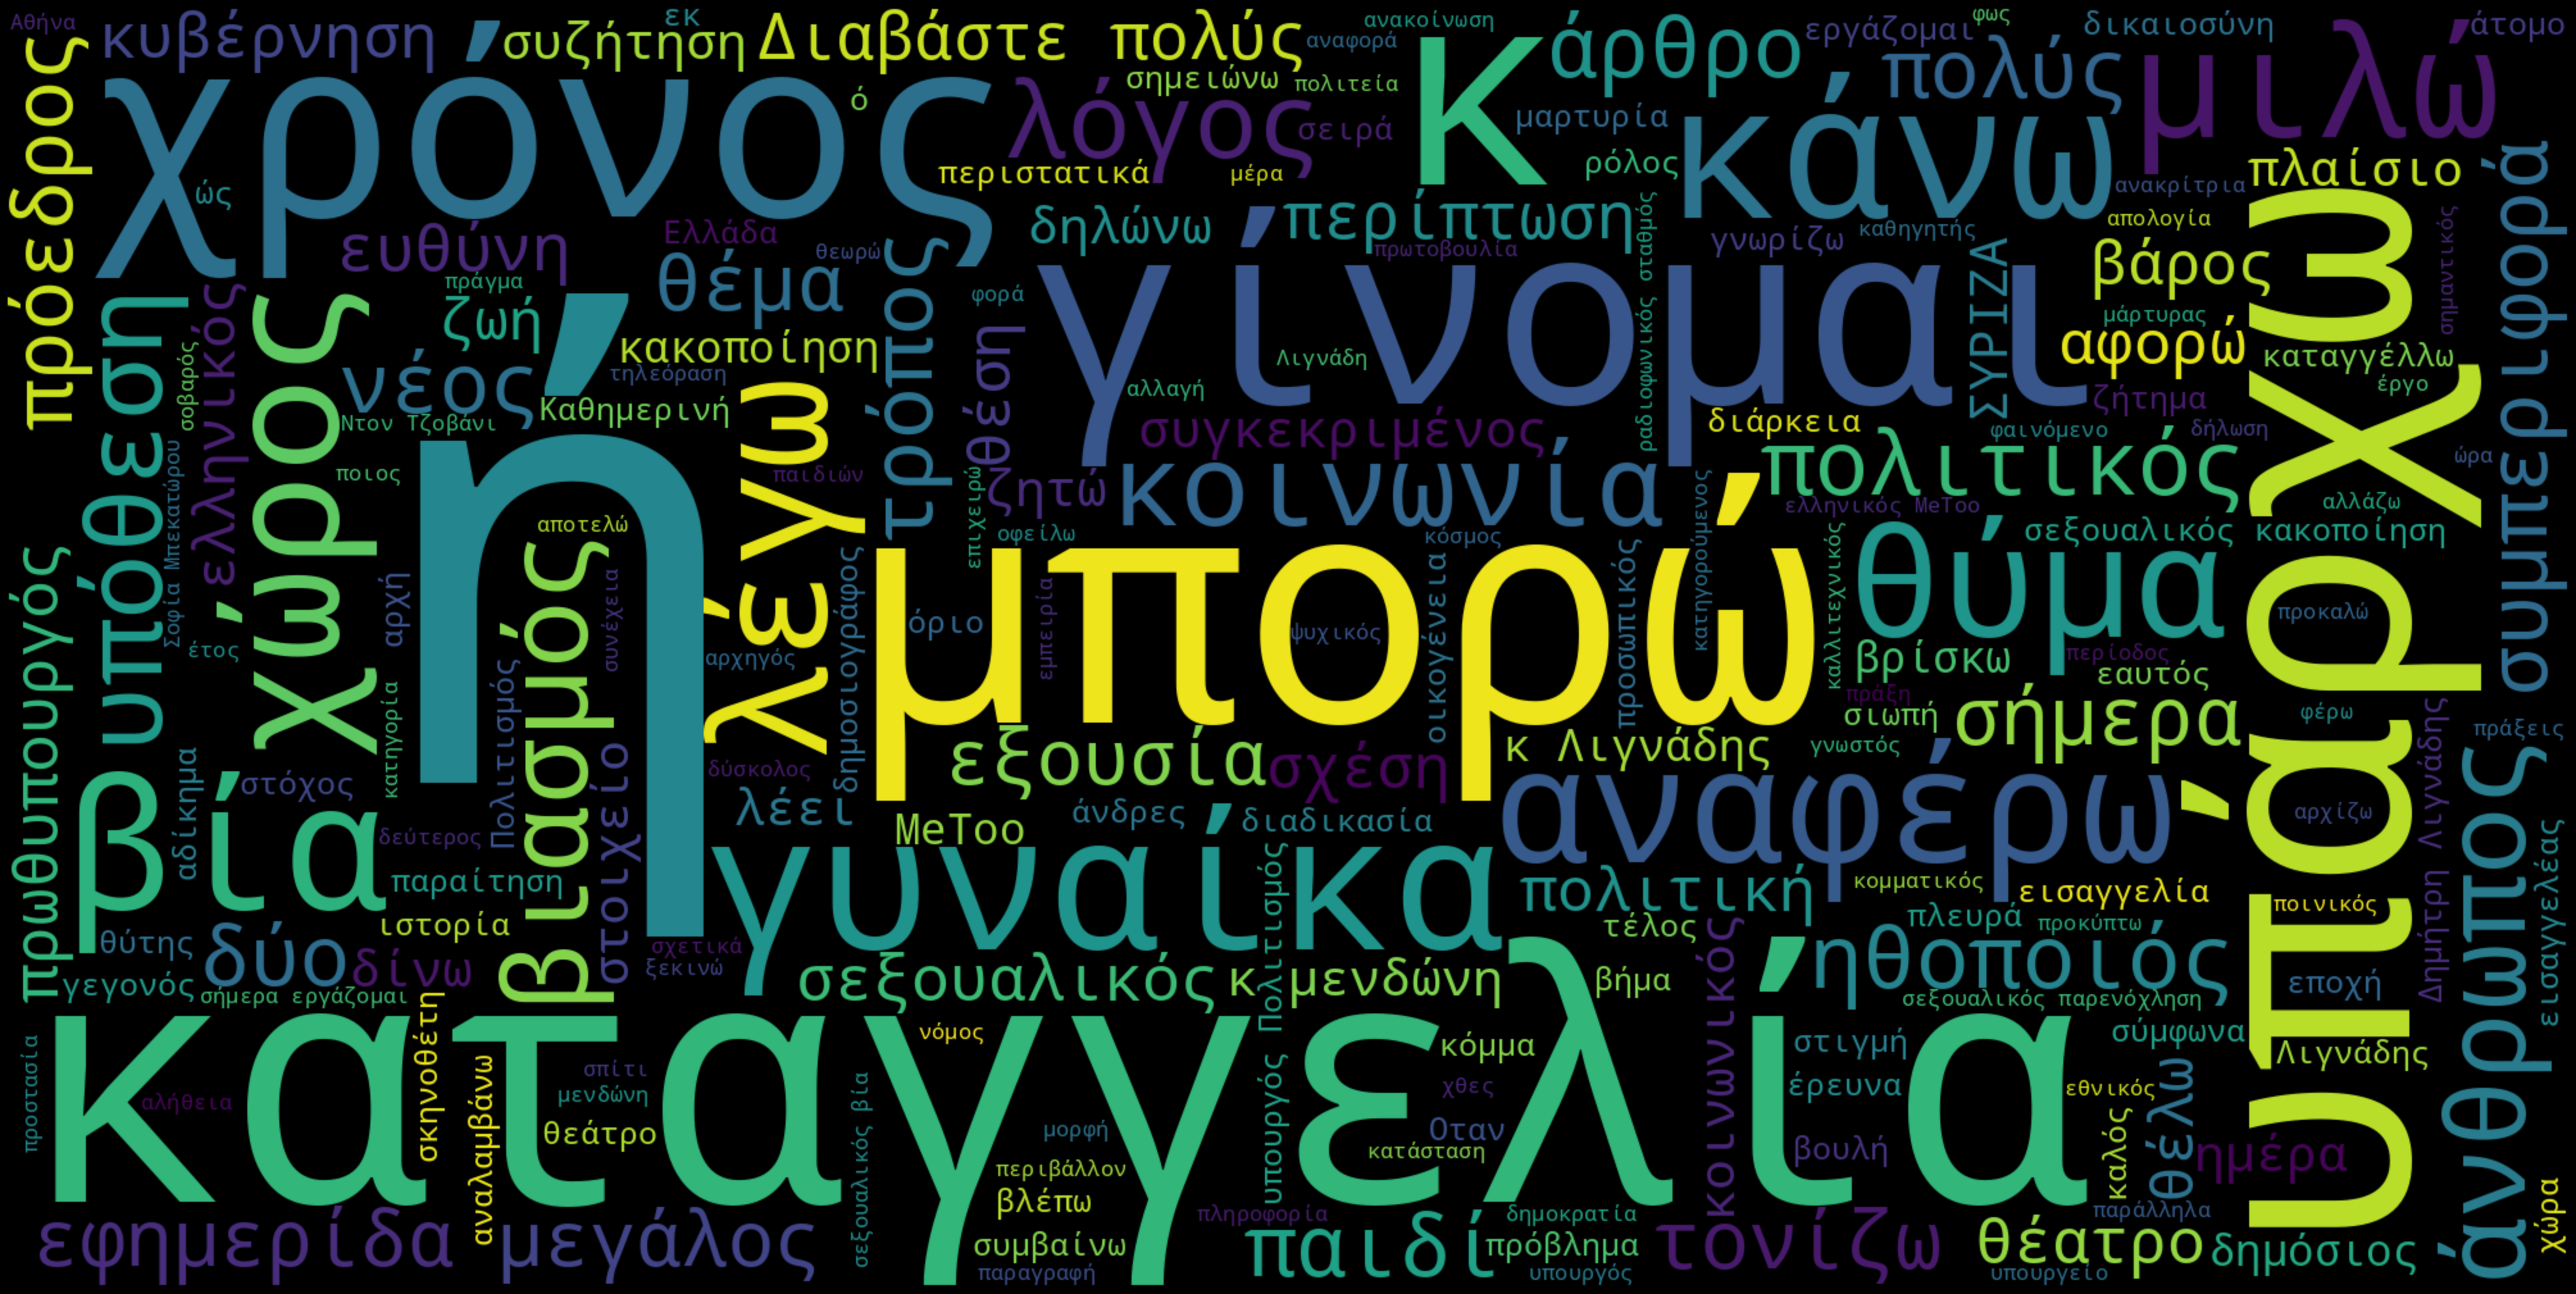

In [25]:
wordcloud2 = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(lemmatized_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud2, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [26]:
print(kathimerini_df_feb.index)

Index([ 14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112],
      dtype='int64')


In [27]:
doc = nlp(kathimerini_df_feb['full_text'][14])

In [28]:
for token in doc:
    print(token, token.lemma_)

Τρεις τρεις
ειδικοί ειδικός
εξηγούν εξηγώ
στην σε ο
« «
Κ Κ
» »
πώς πώς
μπορούμε μπορώ
να να
θωρακίσουμε θωρακίνω
τα ο
παιδιά παιδί
ώστε ώστε
να να
μην μην
πέσουν πέσουν
θύματα θύμα
σεξουαλικής σεξουαλικός
κακοποίησης κακοποίηση
Σύσσωμη Σύσσωμη
η ο
ελληνική ελληνικός
κοινωνία κοινωνία
βιώνει βιώνει
τον ο
τελευταίο τελευταίος
καιρό καιρός
αλλεπάλληλα αλλεπάλληλος
σοκ σοκ
, ,
καθώς καθώς
τραύματα τραύματα
που που
μέχρι μέχρι
πρότινος πρότινος
αιμορραγούσαν αιμορραγούσαν
, ,
αθέατα αθέα
και και
σιωπηλά σιωπηλά
, ,
έρχονται έρχομαι
σιγά σιγά
σιγά σιγά
στην σε ο
επιφάνεια επιφάνεια
. .
Με με
πρωτοστάτες πρωτοστάτος
ανθρώπους άνθρωπος
του ο
αθλητισμού αθλητισμός
και και
του ο
πολιτισμού πολιτισμός
, ,
πολλοί πολύς
έχουν έχω
βρει βρω
το ο
θάρρος θάρρος
να να
μοιραστούν μοιράζω
επώδυνες επώδυνος
εμπειρίες εμπειρία
, ,
κάποιοι κάποιος
για για
πρώτη πρώτος
φορά φορά
, ,
στον σε ο
Τύπο τύπος
, ,
στους σε ο
λογαριασμούς λογαριασμός
τους μου
στα σε ο
μέσα μέσο
κοινωνικής κοινωνικός
δικτύωσης δικτύω

In [29]:
' '.join(token.lemma_ for token in doc)

'τρεις ειδικός εξηγώ σε ο « Κ » πώς μπορώ να θωρακίνω ο παιδί ώστε να μην πέσουν θύμα σεξουαλικός κακοποίηση Σύσσωμη ο ελληνικός κοινωνία βιώνει ο τελευταίος καιρός αλλεπάλληλος σοκ , καθώς τραύματα που μέχρι πρότινος αιμορραγούσαν , αθέα και σιωπηλά , έρχομαι σιγά σιγά σε ο επιφάνεια . με πρωτοστάτος άνθρωπος ο αθλητισμός και ο πολιτισμός , πολύς έχω βρω ο θάρρος να μοιράζω επώδυνος εμπειρία , κάποιος για πρώτος φορά , σε ο τύπος , σε ο λογαριασμός μου σε ο μέσο κοινωνικός δικτύωση , με ο φίλος , ο γονής μου . πριν από λίγος εβδομάδα , πολύς από 60 άτομο μοιράστηκαν εμπειρία σεξουαλικός παρενόχληση ή κακοποίηση με ο « Κ » – ο συντριπτικός πλειονότητα μου ο έχω βιώσει σε ο παιδικός ή σε ο εφηβικός ηλικία . και όσο ο βουνός ο περιστατικός που αποκαλύπτονται μεγαλώνω , τόσο ο γονέας ανησυχώ μήπως ο παιδί μου μπορώ και εκείνος να πουν # MeToo , και άλλος αναρωτιούνται με ποιος τρόπος να εγώ μιλώ για να εγώ προφυλάξουν από ένας πιθανός τραύμα που θα εγώ στιγματίζω για ένας ζωή . ο Γεράσιμο

In [30]:
text

'Τρεις ειδικοί εξηγούν στην «Κ» πώς μπορούμε να θωρακίσουμε τα παιδιά ώστε να μην πέσουν θύματα σεξουαλικής κακοποίησης Σύσσωμη η ελληνική κοινωνία βιώνει τον τελευταίο καιρό αλλεπάλληλα σοκ, καθώς τραύματα που μέχρι πρότινος αιμορραγούσαν, αθέατα και σιωπηλά, έρχονται σιγά σιγά στην επιφάνεια. Με πρωτοστάτες ανθρώπους του αθλητισμού και του πολιτισμού, πολλοί έχουν βρει το θάρρος να μοιραστούν επώδυνες εμπειρίες, κάποιοι για πρώτη φορά, στον Τύπο, στους λογαριασμούς τους στα μέσα κοινωνικής δικτύωσης, με τους φίλους, τους γονείς τους. Πριν από λίγες εβδομάδες, περισσότερα από 60 άτομα μοιράστηκαν εμπειρίες σεξουαλικής παρενόχλησης ή κακοποίησης με την «Κ» – η συντριπτική πλειονότητά τους τις είχε βιώσει στην παιδική ή στην εφηβική ηλικία. Και όσο το βουνό των περιστατικών που αποκαλύπτονται μεγαλώνει, τόσο οι γονείς ανησυχούν μήπως τα παιδιά τους μπορούν κι εκείνα να πουν #MeToo, και άλλοι αναρωτιούνται με ποιον τρόπο να τους μιλήσουν για να τα προφυλάξουν από ένα πιθανό τραύμα που θα

In [31]:
full_doc = nlp(text)

In [32]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [33]:
clear_text[200:400]

'υ μέχρι πρότινος αιμορραγούσαν , αθέα και σιωπηλά , έρχομαι σιγά σιγά σε ο επιφάνεια . με πρωτοστάτος άνθρωπος ο αθλητισμός και ο πολιτισμός , πολύς έχω βρω ο θάρρος να μοιράζω επώδυνος εμπειρία , κάπ'

In [34]:
list(nlp.Defaults.stop_words)[0:20]

['πάντως',
 'πλην',
 'έκαστην',
 'εμπρός',
 'ίδιων',
 'τούτο',
 'έξαφνα',
 'βεβαιότατα',
 'αλλού',
 'ήσασταν',
 'τοι',
 'όλων',
 'οσουδήποτε',
 'συχνού',
 'κάμποσος',
 'ταύτοταύτον',
 'κατόπιν',
 'μόνης',
 'έτσι',
 'οποίοι']

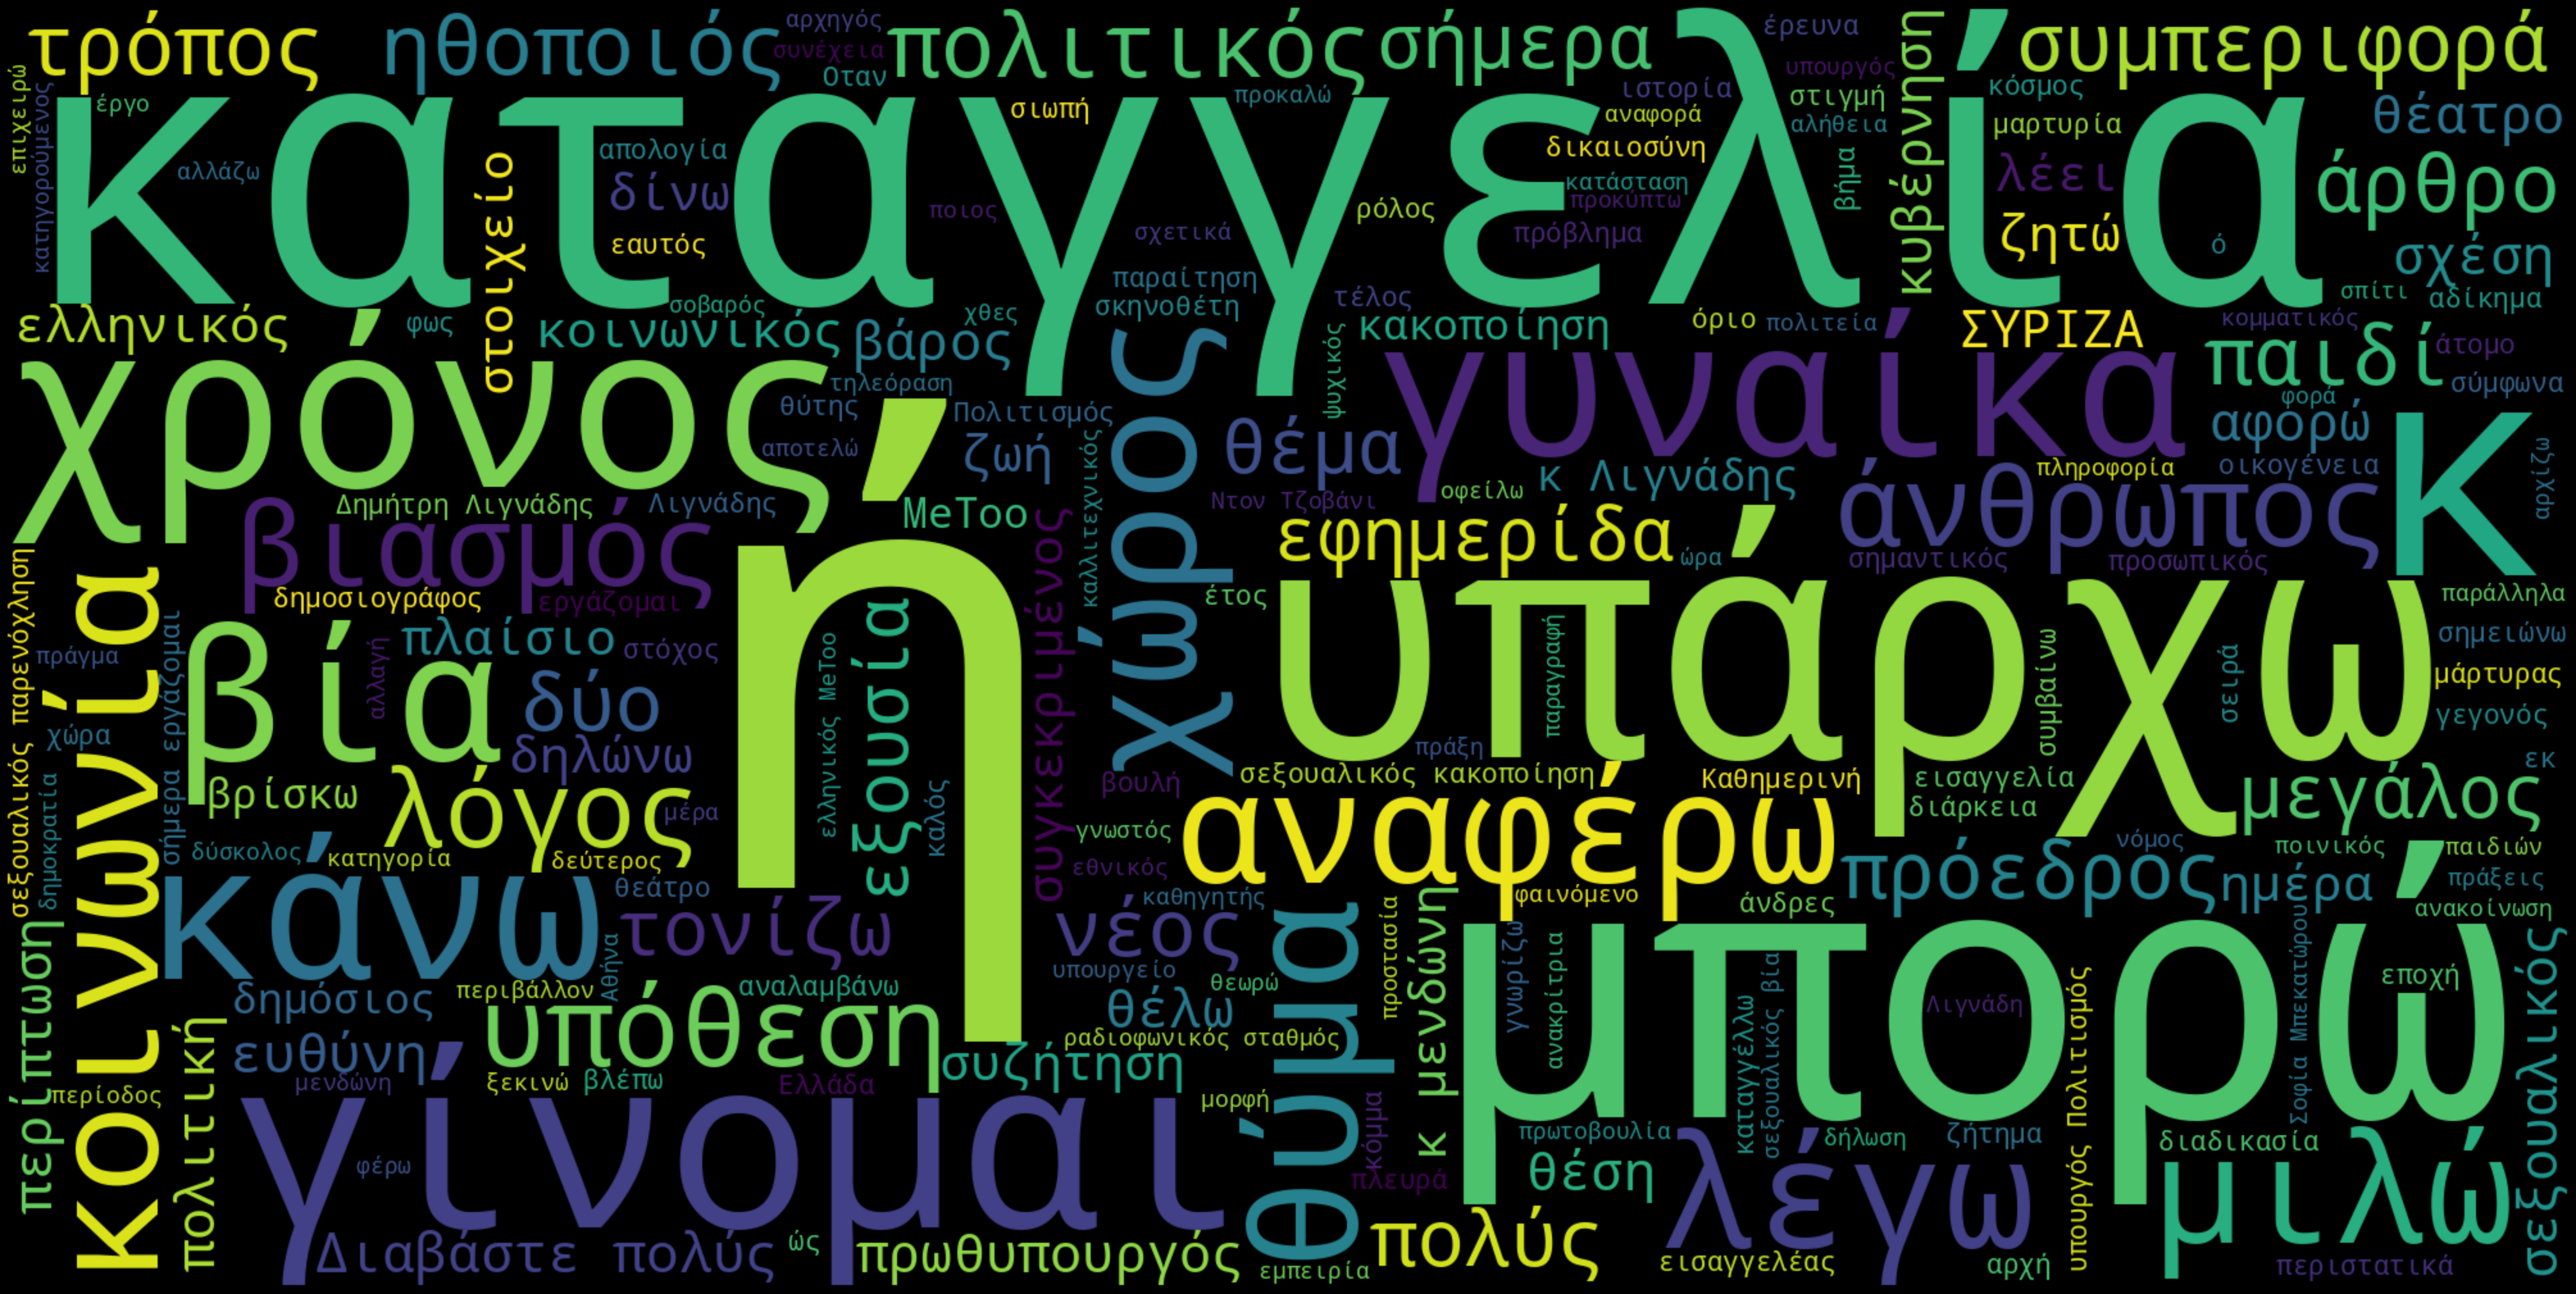

In [35]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
cv = CountVectorizer()

In [38]:
count_vector = cv.fit_transform(kathimerini_df_feb['full_text'])

In [39]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

00  000  08  10  100  100άδες  10η  11  11η  11χρονη  ...  ύφεση  ύφος  \
0   0    0   0   0    0        0    0   0    0        0  ...      0     0   
1   0    0   0   0    0        0    0   0    0        0  ...      0     0   
2   0    0   0   0    0        0    0   0    0        0  ...      0     0   
3   0    0   0   0    0        0    0   0    0        0  ...      0     0   
4   0    0   0   0    0        0    0   0    0        0  ...      0     0   

   ύψιστη  ώθηση  ώπα  ώρα  ώρες  ώριμοι  ώς  ώστε  
0       0      0    0    0     0       0   0     2  
1       0      0    0    0     0       0   0     0  
2       0      0    0    1     0       0   0     0  
3       0      0    0    0     0       0   0     0  
4       0      0    0    0     1       0   0     0  

[5 rows x 11371 columns]

In [40]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [41]:
count_vector = cv.fit_transform(kathimerini_df_feb['full_text'])

In [42]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

00  000  08  10  100  100άδες  10η  11  11η  11χρονη  ...  ύστατη  ύφεση  \
0   0    0   0   0    0        0    0   0    0        0  ...       0      0   
1   0    0   0   0    0        0    0   0    0        0  ...       0      0   
2   0    0   0   0    0        0    0   0    0        0  ...       0      0   
3   0    0   0   0    0        0    0   0    0        0  ...       0      0   
4   0    0   0   0    0        0    0   0    0        0  ...       0      0   

   ύφος  ύψιστη  ώθηση  ώπα  ώρα  ώρες  ώριμοι  ώς  
0     0       0      0    0    0     0       0   0  
1     0       0      0    0    0     0       0   0  
2     0       0      0    0    1     0       0   0  
3     0       0      0    0    0     0       0   0  
4     0       0      0    0    0     1       0   0  

[5 rows x 10955 columns]

In [43]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [44]:
count_vector = cv.fit_transform(kathimerini_df_feb['full_text'])

In [45]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

00  000  08  10  100  100άδες  10η  11  11η  11χρονη  ...  ύστατη  ύφεση  \
0   0    0   0   0    0        0    0   0    0        0  ...       0      0   
1   0    0   0   0    0        0    0   0    0        0  ...       0      0   
2   0    0   0   0    0        0    0   0    0        0  ...       0      0   
3   0    0   0   0    0        0    0   0    0        0  ...       0      0   
4   0    0   0   0    0        0    0   0    0        0  ...       0      0   

   ύφος  ύψιστη  ώθηση  ώπα  ώρα  ώρες  ώριμοι  ώς  
0     0       0      0    0    0     0       0   0  
1     0       0      0    0    0     0       0   0  
2     0       0      0    0    1     0       0   0  
3     0       0      0    0    0     0       0   0  
4     0       0      0    0    0     1       0   0  

[5 rows x 10955 columns]

In [46]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(kathimerini_df_feb['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

metoo  βία  βίας  διαβάστε  δύο  θέατρο  θεάτρου  θύματα  καταγγελίες  κι  \
0      1    0     1         1    0       0        0       2            0   1   
1      1    0     0         1    2       0        0       0            0   2   
2      1    0     0         1    0       3        1       0            0   2   
3      0    0     0         0    1       0        0       0            0   0   
4      0    1     0         1    3       0        0       0            6   1   

   κοινωνία  λιγνάδη  μενδώνη  περισσότερα  πολιτισμού  σήμερα  σεξουαλική  \
0         1        0        0            3           1       0           2   
1         0        0        0            1           2       0           0   
2         0        0        0            1           0       0           0   
3         0        0        0            0           0       1           1   
4         0        6        0            1           0       3           1   

   υπόθεση  χρόνια  χώρο  
0        0       0     0  
1        0       2     1  
2        0       0     0  
3        0       2     0  
4        2       1     1

In [47]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, token_pattern = '\\bκυβ[α-ωά-ώ]*\\b')
count_vector = cv.fit_transform(kathimerini_df_feb['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

κυβέλη  κυβέρνησή  κυβέρνησής  κυβέρνηση  κυβέρνησης  κυβερνήσεις  \
0       0          0           0          0           0            0   
1       0          0           0          1           0            0   
2       0          0           0          0           0            0   
3       0          0           0          0           0            0   
4       0          0           0          0           0            0   

   κυβερνήτη  κυβερνήτης  κυβερνητικές  κυβερνητική  κυβερνητικού  \
0          0           0             0            0             0   
1          0           0             0            0             0   
2          0           0             0            0             0   
3          5           4             0            0             0   
4          0           0             0            0             0   

   κυβερνητικό  κυβερνητικών  κυβερνοχώρο  
0            0             0            0  
1            0             0            0  
2            0             0            0  
3            1             0            0  
4            0             0            0

In [48]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(kathimerini_df_feb['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

αξιωματικής αντιπολίτευσης  δημήτρη λιγνάδη  δημήτρης λιγνάδης  \
0                           0                0                  0   
1                           0                0                  0   
2                           0                0                  0   
3                           0                0                  0   
4                           0                2                  1   

   διαβάστε περισσότερα  εθνικού θεάτρου  εθνικό θέατρο  εισαγγελικές αρχές  \
0                     1                0              0                   0   
1                     1                0              0                   0   
2                     1                0              0                   0   
3                     0                0              0                   0   
4                     1                0              0                   0   

   ελλήνων ηθοποιών  ελληνικό metoo  εφημερίδα καθημερινή  \
0                 0               0                     0   
1                 0               0                     0   
2                 1               0                     0   
3                 0               0                     0   
4                 1               0                     1   

   κοινωνικής δικτύωσης  ντον τζοβάνι  περισσότερα άρθρα  σήμερα εργάζεται  \
0                     1             0                  1                 0   
1                     0             0                  1                 0   
2                     0             0                  1                 0   
3                     0             0                  0                 0   
4                     0             0                  1                 2   

   σεξουαλική κακοποίηση  σεξουαλική παρενόχληση  σεξουαλικής κακοποίησης  \
0                      2                       0                        3   
1                      0                       0                        0   
2                      0                       0                        0   
3                      0                       1                        0   
4                      1                       0                        0   

   υπουργός πολιτισμού  υπόθεση λιγνάδη  χώρο θεάτρου  
0                    0                0             0  
1                    0                0             0  
2                    0                0             0  
3                    0                0             0  
4                    0                1             0

In [49]:
results.sum(axis =0).sort_values(ascending = False)

διαβάστε περισσότερα          54
περισσότερα άρθρα             54
δημήτρη λιγνάδη               36
εθνικού θεάτρου               29
ελλήνων ηθοποιών              24
σήμερα εργάζεται              24
υπουργός πολιτισμού           22
ντον τζοβάνι                  22
δημήτρης λιγνάδης             19
σεξουαλική κακοποίηση         19
εθνικό θέατρο                 17
σεξουαλικής κακοποίησης       17
σεξουαλική παρενόχληση        16
αξιωματικής αντιπολίτευσης    15
υπόθεση λιγνάδη               15
κοινωνικής δικτύωσης          15
εφημερίδα καθημερινή          15
ελληνικό metoo                15
εισαγγελικές αρχές            15
χώρο θεάτρου                  15
dtype: int64

In [50]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

διαβάστε περισσότερα    54
περισσότερα άρθρα       54
δημήτρη λιγνάδη         36
εθνικού θεάτρου         29
ελλήνων ηθοποιών        24
dtype: int64

In [52]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['κακοποίηση', 'τέρας', 'υποστήριξη', 'θύμα', 'παραβίαση δικαιωμάτων'])
count_vector = cv.fit_transform(kathimerini_df_feb['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

κακοποίηση  τέρας  υποστήριξη  θύμα  παραβίαση δικαιωμάτων
0           3      0           0     1                      0
1           0      0           0     0                      0
2           0      0           0     0                      0
3           0      0           0     1                      0
4           1      0           0     0                      0

from matplotlib import pyplot as plt
_df_0['κακοποίηση'].plot(kind='hist', bins=20, title='κακοποίηση')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['θύμα'].plot(kind='hist', bins=20, title='θύμα')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='κακοποίηση', y='θύμα', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['τέρας']
  ys = series['κακοποίηση']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('τέρας', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('τέρας')
_ = plt.ylabel('κακοποίηση')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['τέρας']
  ys = series['θύμα']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('τέρας', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('τέρας')
_ = plt.ylabel('θύμα')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['τέρας']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'τέρας'}, axis=1)
              .sort_values('τέρας', ascending=True))
  xs = counted['τέρας']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('τέρας', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('τέρας')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['υποστήριξη']
  ys = series['κακοποίηση']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('υποστήριξη', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('υποστήριξη')
_ = plt.ylabel('κακοποίηση')

from matplotlib import pyplot as plt
_df_7['κακοποίηση'].plot(kind='line', figsize=(8, 4), title='κακοποίηση')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['θύμα'].plot(kind='line', figsize=(8, 4), title='θύμα')
plt.gca().spines[['top', 'right']].set_visible(False)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(kathimerini_df_feb['full_text'])

In [55]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

15      1958     1986      1990     2004      2005      2009  \
0  0.000000  0.000000  0.00000  0.000000  0.00000  0.000000  0.000000   
1  0.000000  0.000000  0.00000  0.000000  0.00000  0.000000  0.000000   
2  0.000000  0.000000  0.00000  0.000000  0.00000  0.000000  0.000000   
3  0.000000  0.000000  0.00000  0.000000  0.00000  0.000000  0.000000   
4  0.051832  0.058045  0.05663  0.058045  0.05663  0.055313  0.058045   

      2010  2013      2015  ...  χαρακτηριστικά      χθες    χρόνια     χρόνο  \
0  0.00000   0.0  0.000000  ...             0.0  0.000000  0.000000  0.000000   
1  0.00000   0.0  0.107132  ...             0.0  0.000000  0.131543  0.000000   
2  0.00000   0.0  0.000000  ...             0.0  0.000000  0.000000  0.000000   
3  0.00000   0.0  0.116921  ...             0.0  0.000000  0.143562  0.000000   
4  0.15877   0.0  0.113260  ...             0.0  0.051832  0.034767  0.096001   

       χώρα      χώρο  χώρου    χώρους     όρια       ώρα  
0  0.019933  0.000000    0.0  0.020338  0.04244  0.000000  
1  0.000000  0.071066    0.0  0.000000  0.00000  0.000000  
2  0.114272  0.000000    0.0  0.000000  0.00000  0.119049  
3  0.000000  0.000000    0.0  0.000000  0.00000  0.000000  
4  0.000000  0.037566    0.0  0.000000  0.00000  0.000000  

[5 rows x 500 columns]

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

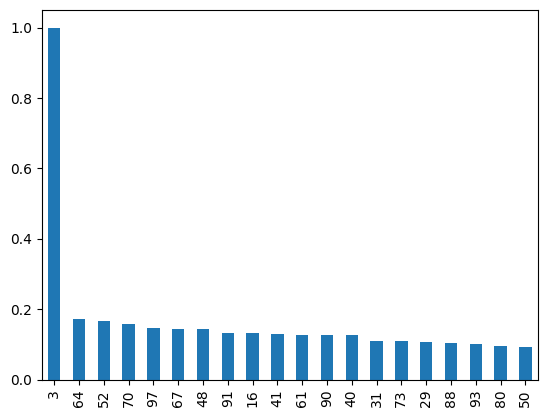

In [58]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [59]:
kathimerini_df_feb['full_text'].iloc[3]

'OΛΜΠΑΝΙ. Τον κυβερνήτη της Νέας Υόρκης, Αντριου Κουόμο, κατηγορεί για εκφοβισμό και σεξουαλική παρενόχληση πρώην βοηθός του. Σε άρθρο της στην ιστοσελίδα Medium, η Λίντσεϊ Μπόιλαν, πρώην προσωπάρχης της οικονομικής υπηρεσίας της πολιτείας, τον κατηγορεί ότι τη θώπευε με κάθε ευκαιρία στο κάτω μέρος της πλάτης, στα μπράτσα και τα πόδια, ενώ επιχείρησε να τη φιλήσει κατά τη διάρκεια σύσκεψης. «Ο κυβερνήτης άρχισε να επιδεικνύει ανησυχητικό βαθμό ενδιαφέροντος για εμένα μετά τον διορισμό μου, το 2015. Ο προϊστάμενός μου με ενημέρωσε ότι ο κυβερνήτης είχε συγκινηθεί μαζί μου. Με ρώτησε αν είχα δει φωτογραφίες της πρώην συντρόφου του Κουόμο, Λίζα Σιλντς, λέγοντάς μου ότι της έμοιαζα πολύ και θα μπορούσα να είμαι η ομορφότερη αδελφή της. Ο Κουόμο άρχισε να με φωνάζει “Λίζα” μπροστά σε συναδέλφους. Ηταν εξευτελιστικό», γράφει η Μπόιλαν. Η καταγγέλλουσα, υποψήφια σήμερα για πρόεδρος του συνοικιακού συμβουλίου του Μανχάταν, είχε γράψει σε σειρά μηνυμάτων της στο Twitter τον Δεκέμβριο ότι είχε 

In [60]:
kathimerini_df_feb['full_text'].iloc[0]

'Τρεις ειδικοί εξηγούν στην «Κ» πώς μπορούμε να θωρακίσουμε τα παιδιά ώστε να μην πέσουν θύματα σεξουαλικής κακοποίησης Σύσσωμη η ελληνική κοινωνία βιώνει τον τελευταίο καιρό αλλεπάλληλα σοκ, καθώς τραύματα που μέχρι πρότινος αιμορραγούσαν, αθέατα και σιωπηλά, έρχονται σιγά σιγά στην επιφάνεια. Με πρωτοστάτες ανθρώπους του αθλητισμού και του πολιτισμού, πολλοί έχουν βρει το θάρρος να μοιραστούν επώδυνες εμπειρίες, κάποιοι για πρώτη φορά, στον Τύπο, στους λογαριασμούς τους στα μέσα κοινωνικής δικτύωσης, με τους φίλους, τους γονείς τους. Πριν από λίγες εβδομάδες, περισσότερα από 60 άτομα μοιράστηκαν εμπειρίες σεξουαλικής παρενόχλησης ή κακοποίησης με την «Κ» – η συντριπτική πλειονότητά τους τις είχε βιώσει στην παιδική ή στην εφηβική ηλικία. Και όσο το βουνό των περιστατικών που αποκαλύπτονται μεγαλώνει, τόσο οι γονείς ανησυχούν μήπως τα παιδιά τους μπορούν κι εκείνα να πουν #MeToo, και άλλοι αναρωτιούνται με ποιον τρόπο να τους μιλήσουν για να τα προφυλάξουν από ένα πιθανό τραύμα που θα

In [61]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

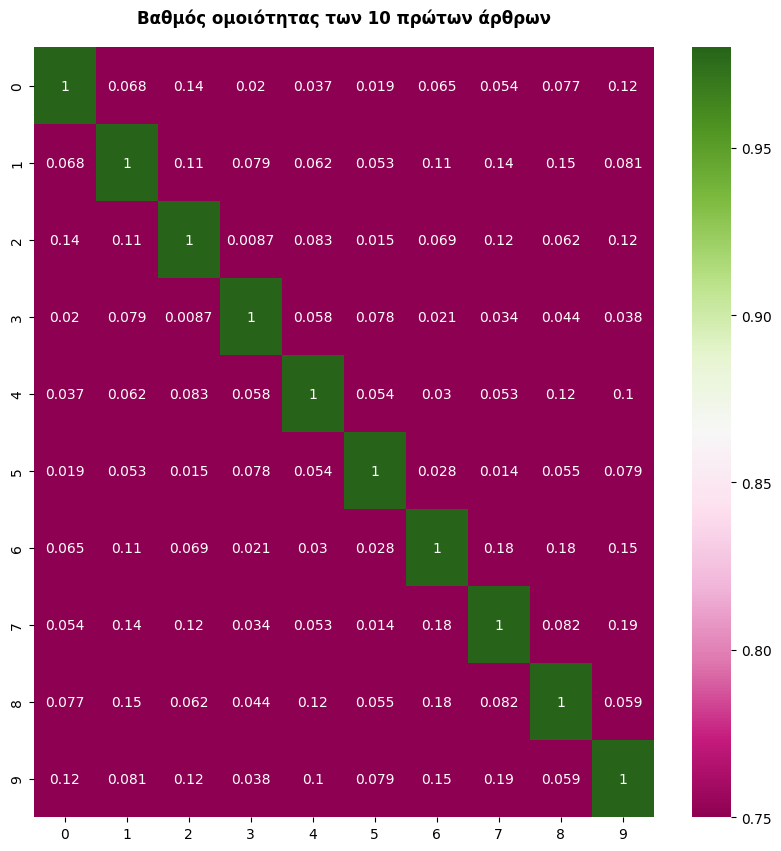

In [62]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

#plt.savefig('<το path και το όνομα του αρχείου>.png')

In [63]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 45.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [64]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [65]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [66]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [67]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13166     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13167  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13168      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13169       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13170          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13166  0.0      0.0       1.0    0.0  
13167  0.0      0.0       0.0    0.0  
13168  0.0      0.0       0.0    0.0  
13169  0.0      0.0       0.0    0.0  
13170  0.0      0.0       0.0    0.0

In [68]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [69]:
emolex_df.tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   
13157  κροκος αυγου       0.0       0.0    0.0           0.0      0.0   0.0   
13158      νεοτερος       1.0       0.0    0.0           0.0      0.0   0.0   
13159       ζεφυρος       0.0       0.0    0.0           0.0      0.0   0.0   
13160          ζουμ       0.0       0.0    0.0           0.0      0.0   0.0   

       Joy  Sadness  Surprise  Trust  
13156  0.0      0.0       1.0    0.0  
13157  0.0      0.0       0.0    0.0  
13158  0.0      0.0       0.0    0.0  
13159  0.0      0.0       0.0    0.0  
13160  0.0      0.0       0.0    0.0

In [70]:
len(kathimerini_df)

120

In [71]:
kathimerini_df_feb.head(1)

title  \
14  «Ασπίδα» η καλή σχέση με τους γονείς   

                                            full_text        author  \
14  Τρεις ειδικοί εξηγούν στην «Κ» πώς μπορούμε να...  Ηλιάνα Μάγρα   

                         date                  datetime  year  month  day  \
14  2021-02-28T20:55:47+02:00 2021-02-28 18:55:47+00:00  2021      2   28   

    hour  
14    18

In [72]:
kathimerini_df_feb_fa = kathimerini_df_feb[['date','full_text' ]]
kathimerini_df_feb_fa = kathimerini_df_feb_fa.rename(columns={'full_text': 'text'} )

In [73]:
kathimerini_df_feb_fa = kathimerini_df_feb_fa.rename(columns={'time': 'date'} )

In [74]:
kathimerini_df_feb_fa.tail()

date  \
108  2021-02-05T16:00:00+02:00   
109  2021-02-03T12:38:33+02:00   
110  2021-02-02T20:50:23+02:00   
111  2021-02-02T20:47:50+02:00   
112  2021-02-01T18:21:44+02:00   

                                                  text  
108  Η Ρόουζ ΜακΓκάουαν εξέφρασε την υποστήριξή της...  
109  «Θυμάμαι έντονα τη φράση που μας έλεγε ο Βασίλ...  
110  Ο Δημήτρης Σταρόβας είναι εξαιρετικός μουσικός...  
111  Η βία στα χείλη της… Ο καταιγισμός αποκαλύψεων...  
112  Τις τελευταίες ημέρες κλιμάκωσης του ελληνικού...

In [75]:
kathimerini_df_feb_fa.dtypes

date    object
text    object
dtype: object

In [76]:
kathimerini_df_feb_fa['date'] = pd.to_datetime(kathimerini_df_feb_fa['date'])

In [77]:
kathimerini_df_feb_fa.dtypes

date    datetime64[ns, UTC+02:00]
text                       object
dtype: object

In [78]:
kathimerini_df_feb_fa.head()

date  \
14 2021-02-28 20:55:47+02:00   
15 2021-02-28 20:53:00+02:00   
16 2021-02-28 20:48:00+02:00   
17 2021-02-27 20:26:09+02:00   
18 2021-02-27 07:30:00+02:00   

                                                 text  
14  Τρεις ειδικοί εξηγούν στην «Κ» πώς μπορούμε να...  
15  Τι έχουν πάθει οι πανεπιστημιακοί; Με ελάχιστε...  
16  Ο στρατηγός Οδυσσέας Γκραντ ως νεαρός αξιωματι...  
17  OΛΜΠΑΝΙ. Τον κυβερνήτη της Νέας Υόρκης, Αντριο...  
18  Ο συνήγορός του δήλωσε ότι θα προσφύγει κατά τ...

In [79]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [80]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [81]:
matrix = vec.fit_transform(kathimerini_df_feb_fa['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [82]:
wordcount_df.shape

(99, 13161)

In [83]:
kathimerini_df_feb_fa = kathimerini_df_feb_fa.reset_index()
kathimerini_df_feb_fa

index                      date  \
0      14 2021-02-28 20:55:47+02:00   
1      15 2021-02-28 20:53:00+02:00   
2      16 2021-02-28 20:48:00+02:00   
3      17 2021-02-27 20:26:09+02:00   
4      18 2021-02-27 07:30:00+02:00   
..    ...                       ...   
94    108 2021-02-05 16:00:00+02:00   
95    109 2021-02-03 12:38:33+02:00   
96    110 2021-02-02 20:50:23+02:00   
97    111 2021-02-02 20:47:50+02:00   
98    112 2021-02-01 18:21:44+02:00   

                                                 text  
0   Τρεις ειδικοί εξηγούν στην «Κ» πώς μπορούμε να...  
1   Τι έχουν πάθει οι πανεπιστημιακοί; Με ελάχιστε...  
2   Ο στρατηγός Οδυσσέας Γκραντ ως νεαρός αξιωματι...  
3   OΛΜΠΑΝΙ. Τον κυβερνήτη της Νέας Υόρκης, Αντριο...  
4   Ο συνήγορός του δήλωσε ότι θα προσφύγει κατά τ...  
..                                                ...  
94  Η Ρόουζ ΜακΓκάουαν εξέφρασε την υποστήριξή της...  
95  «Θυμάμαι έντονα τη φράση που μας έλεγε ο Βασίλ...  
96  Ο Δημήτρης Σταρόβας είναι εξαιρετικός μουσικός...  
97  Η βία στα χείλη της… Ο καταιγισμός αποκαλύψεων...  
98  Τις τελευταίες ημέρες κλιμάκωσης του ελληνικού...  

[99 rows x 3 columns]

In [84]:
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [85]:
emolex_df[emolex_df.Anger == 1].tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13094      διεξοδος       0.0       0.0    1.0           0.0      0.0   0.0   
13096        ζωυφια       0.0       1.0    1.0           0.0      1.0   1.0   
13100    θυματοποιω       0.0       1.0    1.0           0.0      1.0   1.0   
13128  αποτυχημενος       0.0       1.0    1.0           0.0      1.0   0.0   
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   

       Joy  Sadness  Surprise  Trust  
13094  0.0      0.0       0.0    0.0  
13096  0.0      0.0       0.0    0.0  
13100  0.0      1.0       1.0    0.0  
13128  0.0      0.0       0.0    0.0  
13156  0.0      0.0       1.0    0.0

In [86]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [87]:
trust_words

8                        αμην
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
38                 επικοινωνω
45                   εκκλησια
                 ...         
13039                  αληθης
13075             αναμφιβολως
13079             ανυπερβατος
13113            αναθηματικος
13114       αποδειξη πληρωμης
Name: word, Length: 1259, dtype: object

In [88]:
wordcount_df.tail(1)

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
98      0                0        0    0     0      0     0             0   

    αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
98     0       0  ...                 0               0      0        0   

    κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
98          0          0             0         0        0     0  

[1 rows x 13161 columns]

In [89]:
wordcount_df[trust_words].tail(1)

αμην  γαμηλιο ταξιδι  διευθυντρια σχολειου  επικοινωνω  εκκλησια  \
98     0               0                     0           0         0   

    εν τω μεταξυ  ευαγγελιο  κυριε  λιστα ελεγχου  λυρικη σκηνη  ...  \
98             0          0      0              0             0  ...   

    ηλιακο ωρολογιο  συνεργιστικος  διπλο ποδηλατο  ισαξιος  ανακωχη  αληθης  \
98                0              0               0        0        0       0   

    αναμφιβολως  ανυπερβατος  αναθηματικος  αποδειξη πληρωμης  
98            0            0             0                  0  

[1 rows x 1259 columns]

In [90]:
wordcount_df[trust_words].sum(axis=1)

0     26
1     13
2     16
3     10
4     15
      ..
94     5
95    21
96    15
97     7
98    12
Length: 99, dtype: int64

In [91]:
kathimerini_df_feb_fa.tail(3)

index                      date  \
96    110 2021-02-02 20:50:23+02:00   
97    111 2021-02-02 20:47:50+02:00   
98    112 2021-02-01 18:21:44+02:00   

                                                 text  
96  Ο Δημήτρης Σταρόβας είναι εξαιρετικός μουσικός...  
97  Η βία στα χείλη της… Ο καταιγισμός αποκαλύψεων...  
98  Τις τελευταίες ημέρες κλιμάκωσης του ελληνικού...

In [92]:
kathimerini_df_feb_fa.shape

(99, 3)

In [93]:
kathimerini_df_feb_fa['anger'] = wordcount_df[angry_words].sum(axis=1)

kathimerini_df_feb_fa['positive'] = wordcount_df[positive_words].sum(axis=1)

kathimerini_df_feb_fa['joy'] = wordcount_df[joy_words].sum(axis=1)

kathimerini_df_feb_fa['disgust'] = wordcount_df[disgust_words].sum(axis=1)

kathimerini_df_feb_fa['surprise'] = wordcount_df[surprise_words].sum(axis=1)

kathimerini_df_feb_fa['trust'] = wordcount_df[trust_words].sum(axis=1)

kathimerini_df_feb_fa['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

kathimerini_df_feb_fa['sadness'] = wordcount_df[sadness_words].sum(axis=1)

kathimerini_df_feb_fa['negative'] = wordcount_df[negative_words].sum(axis=1)

kathimerini_df_feb_fa['fear'] = wordcount_df[fear_words].sum(axis=1)

In [94]:
kathimerini_df_feb_fa

index                      date  \
0      14 2021-02-28 20:55:47+02:00   
1      15 2021-02-28 20:53:00+02:00   
2      16 2021-02-28 20:48:00+02:00   
3      17 2021-02-27 20:26:09+02:00   
4      18 2021-02-27 07:30:00+02:00   
..    ...                       ...   
94    108 2021-02-05 16:00:00+02:00   
95    109 2021-02-03 12:38:33+02:00   
96    110 2021-02-02 20:50:23+02:00   
97    111 2021-02-02 20:47:50+02:00   
98    112 2021-02-01 18:21:44+02:00   

                                                 text  anger  positive  joy  \
0   Τρεις ειδικοί εξηγούν στην «Κ» πώς μπορούμε να...     32        50   25   
1   Τι έχουν πάθει οι πανεπιστημιακοί; Με ελάχιστε...     12        18    5   
2   Ο στρατηγός Οδυσσέας Γκραντ ως νεαρός αξιωματι...     15        22    6   
3   OΛΜΠΑΝΙ. Τον κυβερνήτη της Νέας Υόρκης, Αντριο...      8        11    3   
4   Ο συνήγορός του δήλωσε ότι θα προσφύγει κατά τ...      6        25    6   
..                                                ...    ...       ...  ...   
94  Η Ρόουζ ΜακΓκάουαν εξέφρασε την υποστήριξή της...      8         6    2   
95  «Θυμάμαι έντονα τη φράση που μας έλεγε ο Βασίλ...     16        21   10   
96  Ο Δημήτρης Σταρόβας είναι εξαιρετικός μουσικός...     12        19   10   
97  Η βία στα χείλη της… Ο καταιγισμός αποκαλύψεων...      7        12    2   
98  Τις τελευταίες ημέρες κλιμάκωσης του ελληνικού...     17        17    5   

    disgust  surprise  trust  anticipation  sadness  negative  fear  
0        36        15     26            23       15        74    21  
1         4         7     13             9       11        22    12  
2         7         4     16             7        2        16     6  
3         6         6     10             9        8        13    11  
4        13        11     15            12       12        18    15  
..      ...       ...    ...           ...      ...       ...   ...  
94        6         2      5             2        7         8     9  
95        7         6     21            11       15        30    16  
96       12         6     15             7        7        21     6  
97        4         3      7             3        4        11     5  
98       13         7     12             7       18        27    18  

[99 rows x 13 columns]

In [95]:
kathimerini_df_feb_fa.reset_index(inplace=True)
kathimerini_df_feb_fa.set_index('date', inplace=True)
kathimerini_df_feb_fa

level_0  index  \
date                                        
2021-02-28 20:55:47+02:00        0     14   
2021-02-28 20:53:00+02:00        1     15   
2021-02-28 20:48:00+02:00        2     16   
2021-02-27 20:26:09+02:00        3     17   
2021-02-27 07:30:00+02:00        4     18   
...                            ...    ...   
2021-02-05 16:00:00+02:00       94    108   
2021-02-03 12:38:33+02:00       95    109   
2021-02-02 20:50:23+02:00       96    110   
2021-02-02 20:47:50+02:00       97    111   
2021-02-01 18:21:44+02:00       98    112   

                                                                        text  \
date                                                                           
2021-02-28 20:55:47+02:00  Τρεις ειδικοί εξηγούν στην «Κ» πώς μπορούμε να...   
2021-02-28 20:53:00+02:00  Τι έχουν πάθει οι πανεπιστημιακοί; Με ελάχιστε...   
2021-02-28 20:48:00+02:00  Ο στρατηγός Οδυσσέας Γκραντ ως νεαρός αξιωματι...   
2021-02-27 20:26:09+02:00  OΛΜΠΑΝΙ. Τον κυβερνήτη της Νέας Υόρκης, Αντριο...   
2021-02-27 07:30:00+02:00  Ο συνήγορός του δήλωσε ότι θα προσφύγει κατά τ...   
...                                                                      ...   
2021-02-05 16:00:00+02:00  Η Ρόουζ ΜακΓκάουαν εξέφρασε την υποστήριξή της...   
2021-02-03 12:38:33+02:00  «Θυμάμαι έντονα τη φράση που μας έλεγε ο Βασίλ...   
2021-02-02 20:50:23+02:00  Ο Δημήτρης Σταρόβας είναι εξαιρετικός μουσικός...   
2021-02-02 20:47:50+02:00  Η βία στα χείλη της… Ο καταιγισμός αποκαλύψεων...   
2021-02-01 18:21:44+02:00  Τις τελευταίες ημέρες κλιμάκωσης του ελληνικού...   

                           anger  positive  joy  disgust  surprise  trust  \
date                                                                        
2021-02-28 20:55:47+02:00     32        50   25       36        15     26   
2021-02-28 20:53:00+02:00     12        18    5        4         7     13   
2021-02-28 20:48:00+02:00     15        22    6        7         4     16   
2021-02-27 20:26:09+02:00      8        11    3        6         6     10   
2021-02-27 07:30:00+02:00      6        25    6       13        11     15   
...                          ...       ...  ...      ...       ...    ...   
2021-02-05 16:00:00+02:00      8         6    2        6         2      5   
2021-02-03 12:38:33+02:00     16        21   10        7         6     21   
2021-02-02 20:50:23+02:00     12        19   10       12         6     15   
2021-02-02 20:47:50+02:00      7        12    2        4         3      7   
2021-02-01 18:21:44+02:00     17        17    5       13         7     12   

                           anticipation  sadness  negative  fear  
date                                                              
2021-02-28 20:55:47+02:00            23       15        74    21  
2021-02-28 20:53:00+02:00             9       11        22    12  
2021-02-28 20:48:00+02:00             7        2        16     6  
2021-02-27 20:26:09+02:00             9        8        13    11  
2021-02-27 07:30:00+02:00            12       12        18    15  
...                                 ...      ...       ...   ...  
2021-02-05 16:00:00+02:00             2        7         8     9  
2021-02-03 12:38:33+02:00            11       15        30    16  
2021-02-02 20:50:23+02:00             7        7        21     6  
2021-02-02 20:47:50+02:00             3        4        11     5  
2021-02-01 18:21:44+02:00             7       18        27    18  

[99 rows x 13 columns]

<Axes: xlabel='date'>

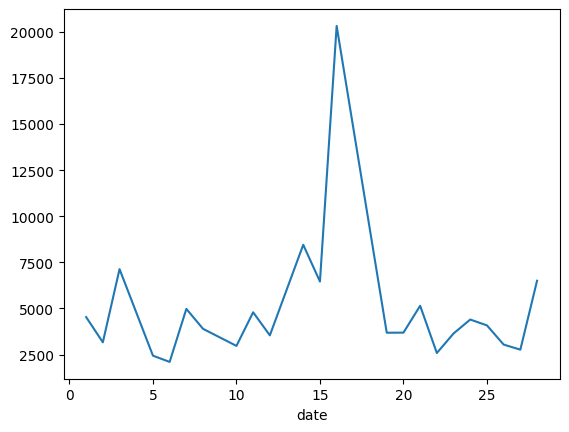

In [97]:
kathimerini_df_feb_fa['text'].str.len().groupby(by=kathimerini_df_feb_fa.index.day).mean().plot()

In [98]:
kathimerini_df_feb_fa['month']=kathimerini_df_feb_fa.index.month
kathimerini_df_feb_fa['month']

date
2021-02-28 20:55:47+02:00    2
2021-02-28 20:53:00+02:00    2
2021-02-28 20:48:00+02:00    2
2021-02-27 20:26:09+02:00    2
2021-02-27 07:30:00+02:00    2
                            ..
2021-02-05 16:00:00+02:00    2
2021-02-03 12:38:33+02:00    2
2021-02-02 20:50:23+02:00    2
2021-02-02 20:47:50+02:00    2
2021-02-01 18:21:44+02:00    2
Name: month, Length: 99, dtype: int32

Text(0.5, 1.02, ' Kathimerini: Aριθμός των κειμένων για κάθε ημέρα')

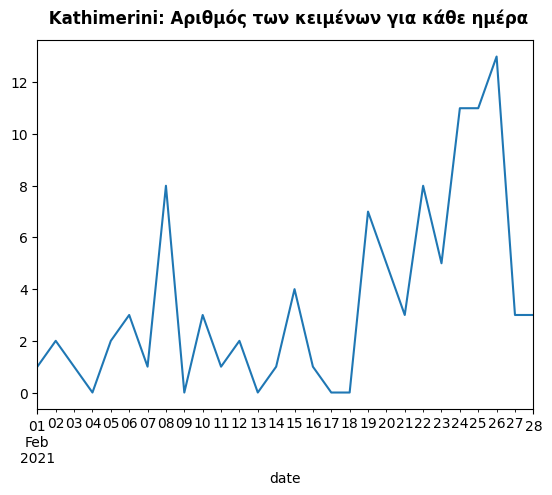

In [99]:
kathimerini_df_feb_fa['text'].resample('D').count().plot()
plt.title(' Kathimerini: Aριθμός των κειμένων για κάθε ημέρα', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Newsbomb: Συνολική τιμή της θετικότητας για κάθε ημέρα')

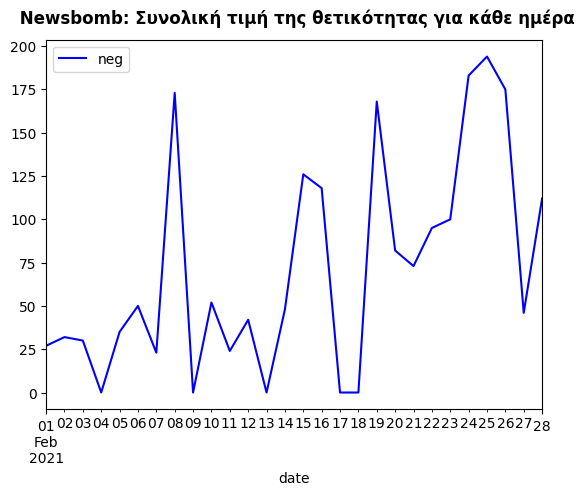

In [100]:
kathimerini_df_feb_fa['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend()
plt.title(' Newsbomb: Συνολική τιμή της θετικότητας για κάθε ημέρα', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Kathimerini: Εμπιστοσύνη ')

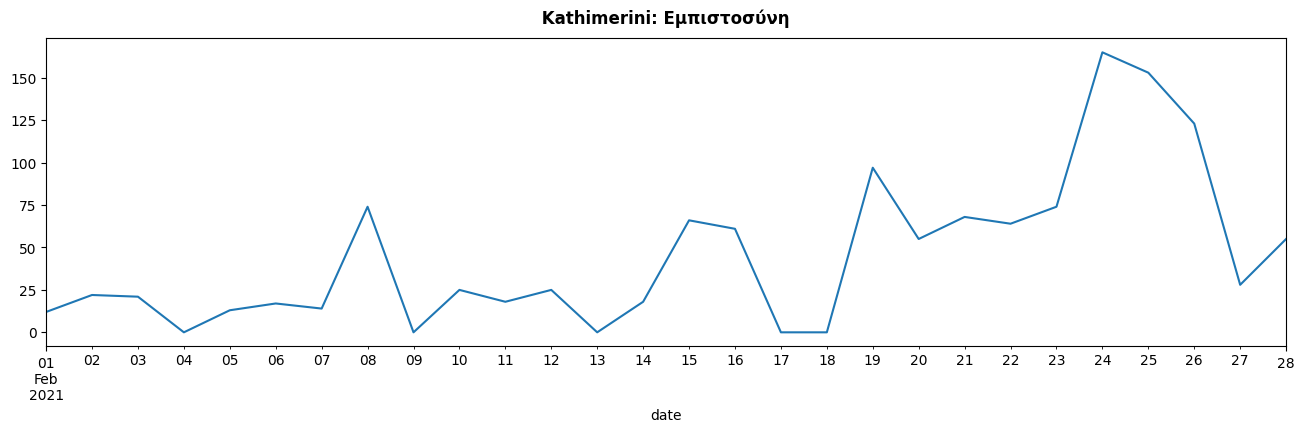

In [101]:
kathimerini_df_feb_fa['trust'].resample('D').sum().plot(figsize=(16,4))
plt.title(' Kathimerini: Εμπιστοσύνη ', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Kathimerini: Θυμός vs Χαρά')

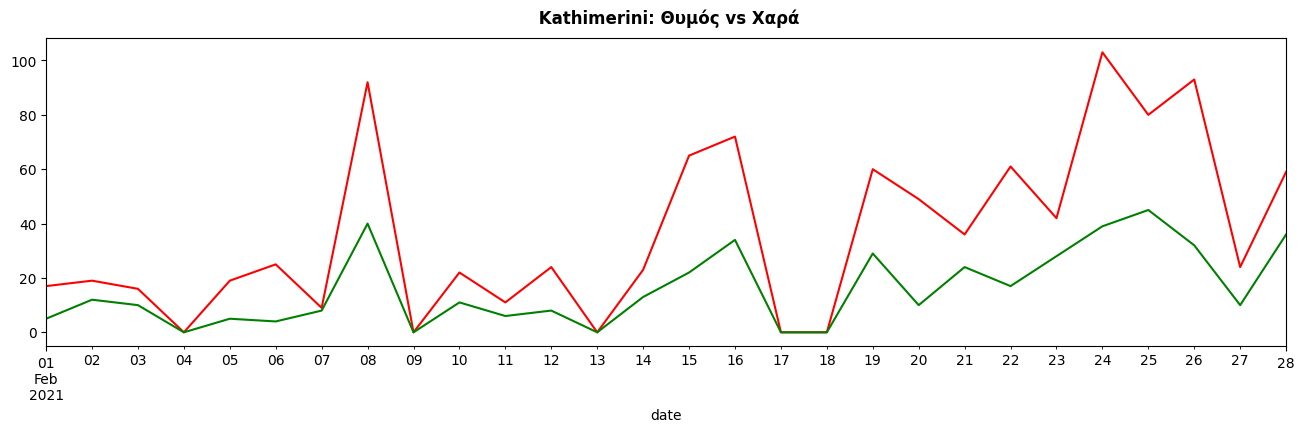

In [102]:
ax = kathimerini_df_feb_fa['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
kathimerini_df_feb_fa['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
plt.title(' Kathimerini: Θυμός vs Χαρά', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Kathimerini: Θετικότητα vs Αρνητικότητα vs Εμπιστοσύνη')

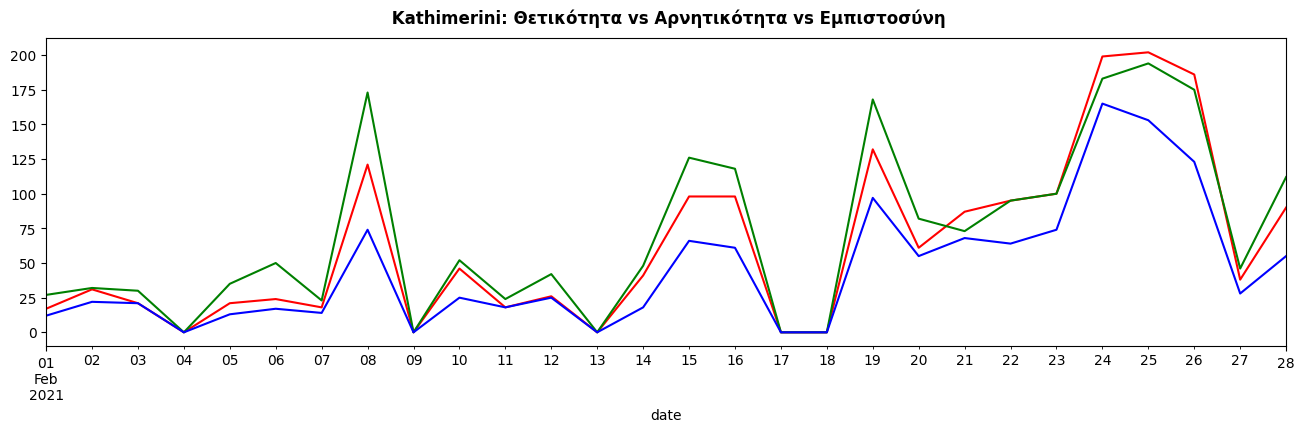

In [103]:
ax = kathimerini_df_feb_fa['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
kathimerini_df_feb_fa['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
kathimerini_df_feb_fa['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue')
plt.title(' Kathimerini: Θετικότητα vs Αρνητικότητα vs Εμπιστοσύνη', y=1.02, fontweight='bold')

In [104]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [105]:
#plt.style.use('classic')
#plt.style.use('ggplot')
plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

Text(0.5, 1.02, ' Kathimerini: Θετικότητα vs Αρνητικότητα vs Εμπιστοσύνη vs Αηδία')

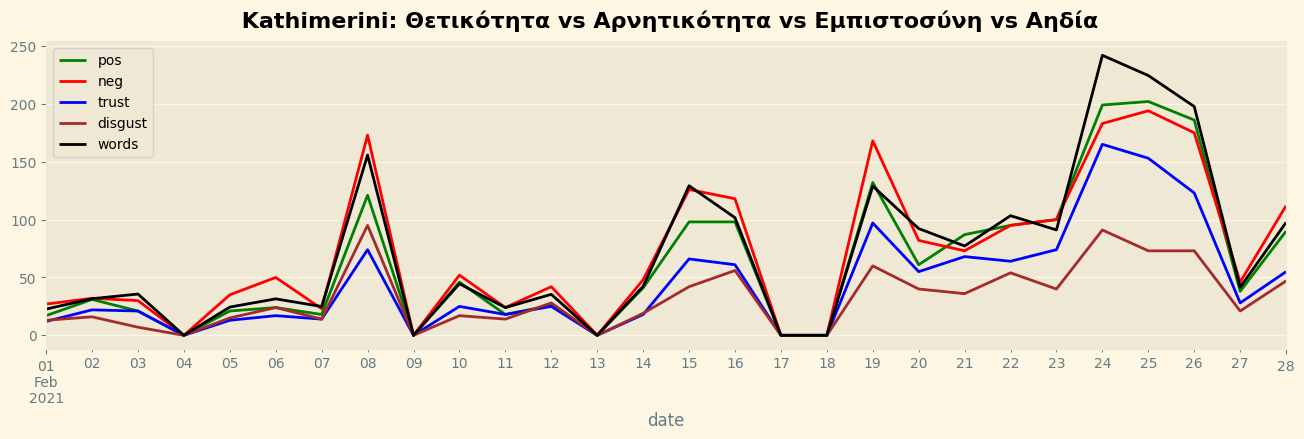

In [106]:
ax = kathimerini_df_feb_fa['positive'].resample('D').sum().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
kathimerini_df_feb_fa['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
kathimerini_df_feb_fa['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
kathimerini_df_feb_fa['disgust'].resample('D').sum().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(kathimerini_df_feb_fa['text'].str.len().resample('D').sum()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()
plt.title(' Kathimerini: Θετικότητα vs Αρνητικότητα vs Εμπιστοσύνη vs Αηδία', y=1.02, fontweight='bold')

Text(0.5, 1.02, ' Kathimerini: Θετικότητα vs Αρνητικότητα')

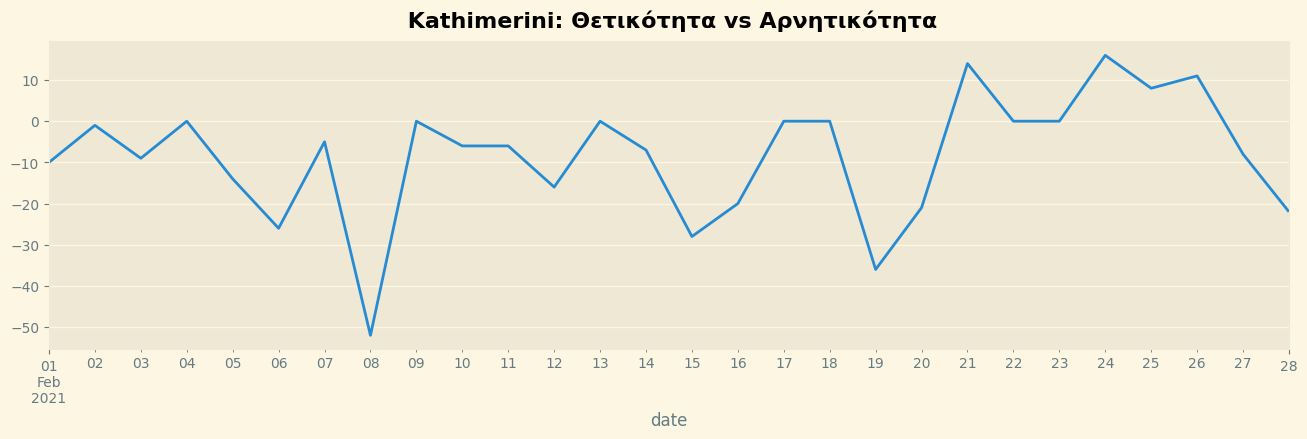

In [107]:
kathimerini_df_feb_fa['pos/neg'] = kathimerini_df_feb_fa['positive'] - kathimerini_df_feb_fa['negative']
kathimerini_df_feb_fa['pos/neg'].resample('D').sum().plot(figsize=(16,4))
plt.title(' Kathimerini: Θετικότητα vs Αρνητικότητα', y=1.02, fontweight='bold')

In [108]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

In [109]:
kathimerini_df_feb_fa['(+)φόβος | θυμός(-)'] = kathimerini_df_feb_fa.positive*100//kathimerini_df_feb_fa[['fear','anger']].sum(
        axis=1) - kathimerini_df_feb_fa.negative*100//kathimerini_df_feb_fa[['fear','anger']].sum(axis=1)

Text(0.5, 1.02, ' Kathimerini: Φόβος(+) vs θυμός (-) ')

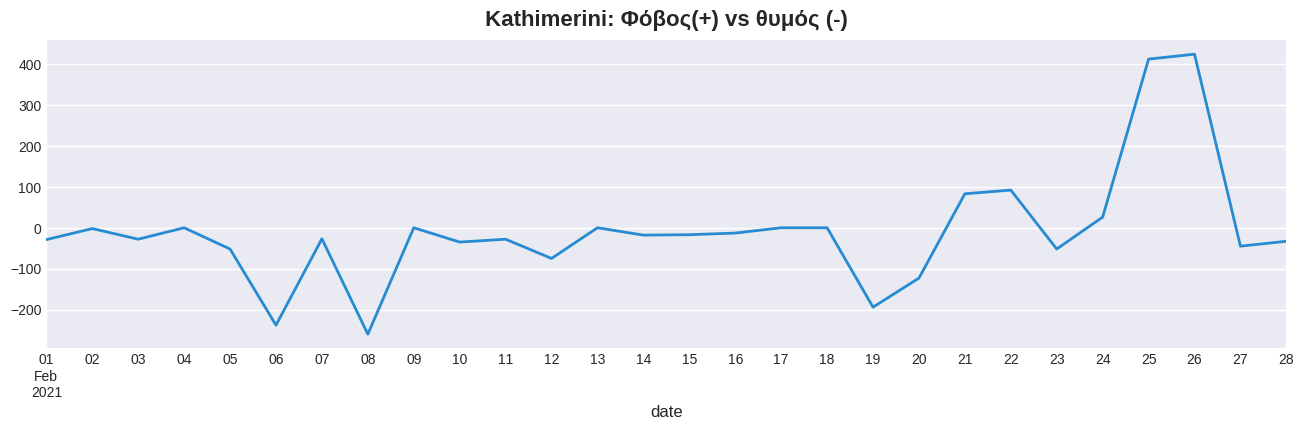

In [110]:
kathimerini_df_feb_fa['(+)φόβος | θυμός(-)'].resample('D').sum().plot(figsize=(16,4))
plt.title(' Kathimerini: Φόβος(+) vs θυμός (-) ', y=1.02, fontweight='bold')